# Modelling cluster magnetic fields as Gaussian random fields

In [1]:
# for testing
import sys
sys.path.insert(0, "/home/osingae/OneDrive/postdoc/software/magneticfields/src/")

In [2]:
from grampa import magneticfieldmodel
from grampa import magneticfieldmodel_utils as mutils

First we have to define an electron density radial profile. Let's use a typical beta-model, which is implemented in mutils. We'll set the parameters to be those of the galaxy cluster Abell 2256, reported in Osinga+2024

It needs to be a function that takes a radius in kpc, and returns ionized electron density in cm^-3. 

In [3]:
# The electron density model (can replace by own model, currently wraps around beta model)
def ne_funct(r):
    """Takes radius in kpc and returns n_e in cm^-3    
    use Osinga+24 parameters for Abell 2256, from Remi Adam
    """
    return mutils.beta_model(r, ne0_cm3=0.0031, rc_kpc=341, beta=0.77)

Then we'll need to define the parameters for the magnetic field as a dictionary

In [4]:
args = {
'sourcename': 'example_A2256', # sourcename for saving filenames
 'reffreq': 944.0, # reference frequency in MHz
 'cz': 0.058, # cluster redshift 
 'iteration': 0, # simple counter for saving filenames
 'xi': 5.67, # vector potential power spectrum index
 'eta': 0.5, # B propto ne^eta, 0.5 = constant ratio of magnetic to thermal energy for an isothermal cluster
 'B0': 1.0, # central magnetic field strength
 'lambdamax': 200, # maximum B-field fluctuation scale in kpc
 'pixsize': 10.0, # 1 pixel = this many kpc
 'N': 256, # amount of pixels, will generate N^3 cube
 'fluctuate_ne': True, # whether to simulate smooth (False) or fluctuating (True) electron density 
 'mu_ne_fluct': 1.0, # mean of the fluctuating ne cube (arbitrary number because its normalised to the ne profile after)
 'sigma_ne_fluct': 0.2, # fluctuation magnitude in ne profile
 'lambdamax_ne_fluct': 100, # maximum n_e fluctuation scale in kpc
 'dtype': 32, # float32 will be used to save memory
 'garbagecollect': True, # enforce garbagecollect during the code to save memory
 'recompute': True, # force recompute, even if previous run was saved to file
 'subcube_ne': True, # use spherical symmetry to speed up calculations involving ne cube
 'savedir': '../tests_local/', # where to save the results
 'saverawfields': True, # Whether to save the unnormalised A vector potential and B field.
 'saveresults': True, # Whether to save the normalised B field, RM images, etc (i.e. the results)
 'beamsize': 20.0, # beamsize in arcseconds for smoothing RM images
 'frame': 'observedframe', # whether to calculate RM images in observed frame or cluster rest-frame. (1+z)^2 factor difference
 'testing': True # whether to make plots for verification
 }


Now, we initialise the model with the electron density function and the arguments defined above

In [5]:
# Initialise the model with arguments and density function
model = magneticfieldmodel.MagneticFieldModel(args, ne_funct=ne_funct)

2025-06-12 15:02:05,799 INFO magneticfieldmodel __init__ Creating magnetic field model with GRAMPA...
2025-06-12 15:02:05,802 WARNING magneticfieldmodel check_resolution_beamsize User input angular resolution of 20.0 arcsec corresponds to physical resolution of 22.46 kpc (FWHM).
2025-06-12 15:02:05,805 WARNING magneticfieldmodel check_resolution_beamsize WARNING: However, models are being ran with p=10.0 kpc. The code will smooth to 50.0 kpc automatically. This corresponds to a beam size of 44.51 arcsec instead. Please keep this in mind.
2025-06-12 15:02:05,807 INFO magneticfieldmodel log_parameters Using parameters:
2025-06-12 15:02:05,808 INFO magneticfieldmodel log_parameters  xi=5.67 (n=3.67)
2025-06-12 15:02:05,809 INFO magneticfieldmodel log_parameters  N=256
2025-06-12 15:02:05,811 INFO magneticfieldmodel log_parameters  eta=0.5
2025-06-12 15:02:05,812 INFO magneticfieldmodel log_parameters  B0=1.0
2025-06-12 15:02:05,813 INFO magneticfieldmodel log_parameters  pixsize=10.0 kpc


2025-06-12 15:02:05,831 INFO magneticfieldmodel log_parameters  paramstring= N=256_p=10_B0=1.0_xi=5.67_eta=0.50_s=example_A2256_Lmax=200_it0_b44.51asec_obsframe_neLmax_100


And simply start the calculation as follows. 

Because we have testing=True, many plots will be generated which can be used to verify whether the model is sensible.

2025-06-12 15:02:05,847 INFO magneticfieldmodel run_model User forces recompute, so recomputing everything.
2025-06-12 15:02:05,848 INFO magneticfieldmodel run_model Starting from scratch...
2025-06-12 15:02:07,539 INFO magneticfieldmodel computeBfromA Generating k vector in (256,256,128,3) space
2025-06-12 15:02:07,613 INFO magneticfieldmodel computeBfromA Calculating magnetic field using the crossproduct Equation
2025-06-12 15:02:08,147 INFO magneticfieldmodel computeBfromA Deleted kvec. Collecting garbage..
2025-06-12 15:02:08,219 INFO magneticfieldmodel computeBfromA Memory used: 0.6 GB
2025-06-12 15:02:08,539 INFO magneticfieldmodel computeBfromA Ran IFFT.. Collecting garbage..
2025-06-12 15:02:08,649 INFO magneticfieldmodel computeBfromA Memory used: 0.8 GB
2025-06-12 15:02:08,652 INFO magneticfieldmodel run_model Saving fourier vector potential to ../tests_local/Afield_N=256_p=10_xi=5.67_Lmax=200_it0.npy, such that it can be used again
2025-06-12 15:02:08,777 INFO magneticfieldm

iteration 1
convergence = 0.021731404668040664

iteration 2
convergence = 0.0009693780945010173



2025-06-12 15:02:20,033 INFO magneticfieldmodel run_model Normalising ne cube to follow the mean profile of the requested beta function
2025-06-12 15:02:20,299 INFO magneticfieldmodel run_model Deleted B_field and xvec_length. Collecting garbage..
2025-06-12 15:02:20,362 INFO magneticfieldmodel run_model Memory used: 0.7 GB


Plotting normalised B-field amplitude


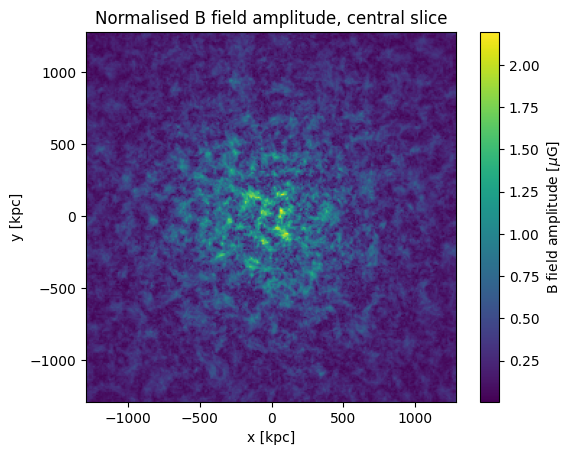

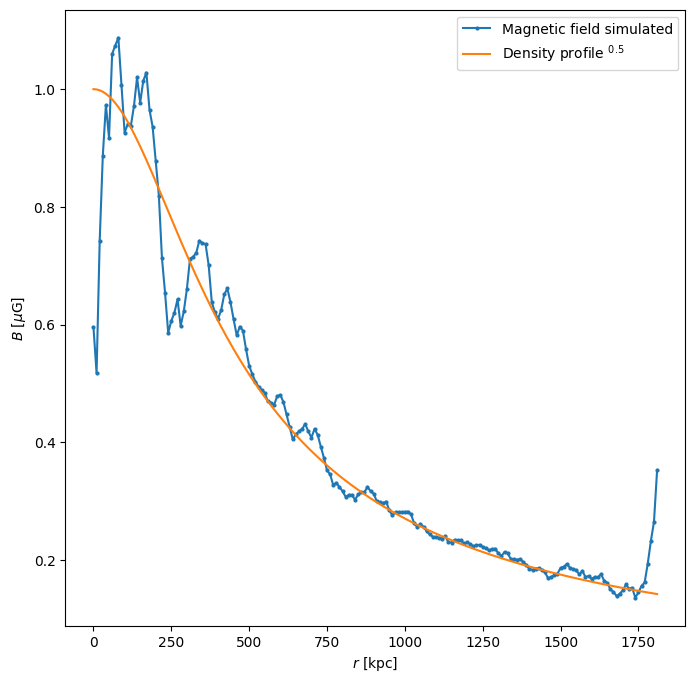

Plotting normalised B-field power spectrum


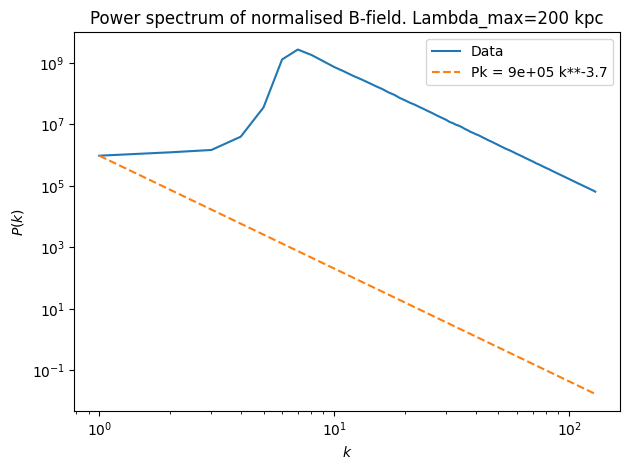

2025-06-12 15:02:22,141 INFO magneticfieldmodel run_model Calculating rotation measure images.


Plotting electron density image slice, shape (256, 256, 256)


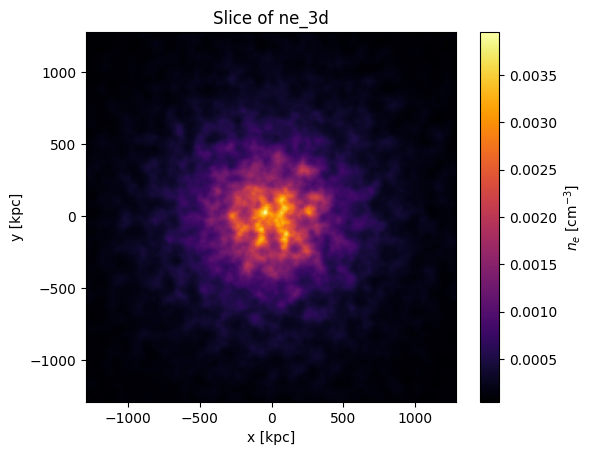

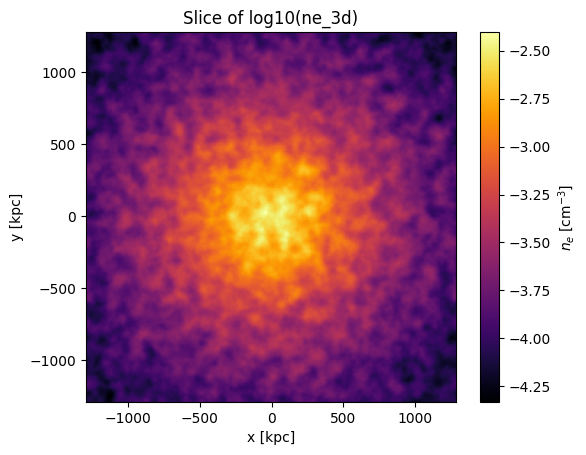

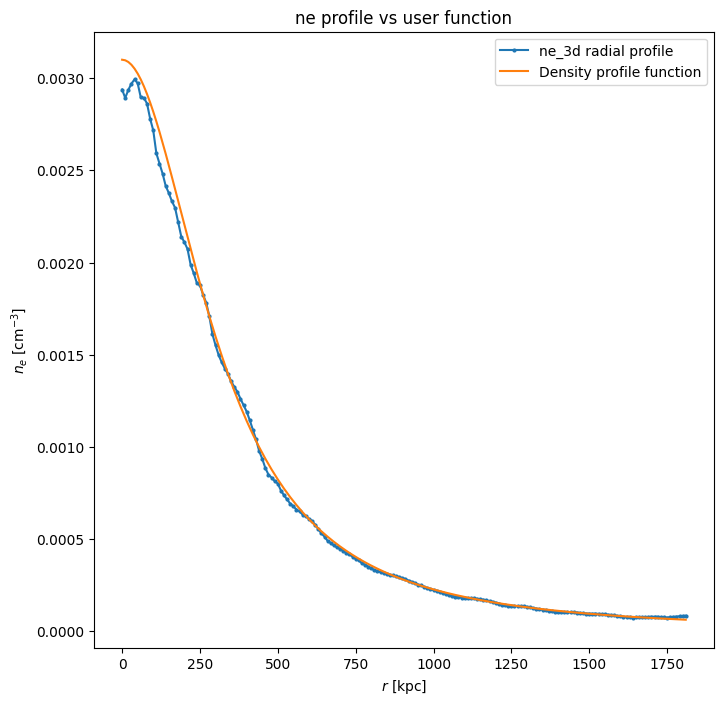

Plotting RM images. Unconvolved & convolved


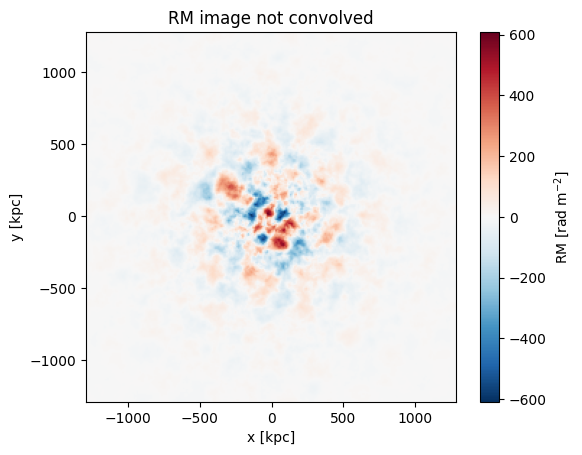

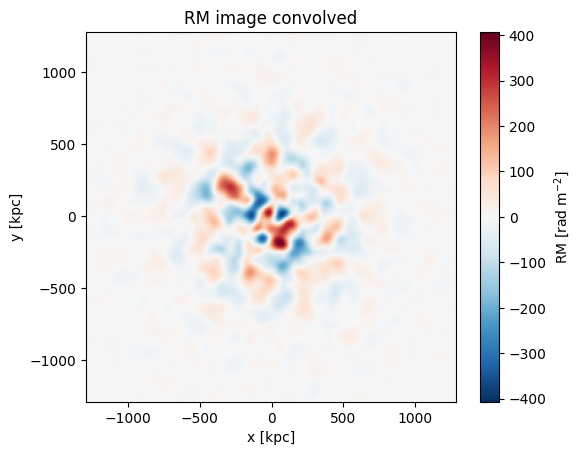

Plotting RM power spectrum


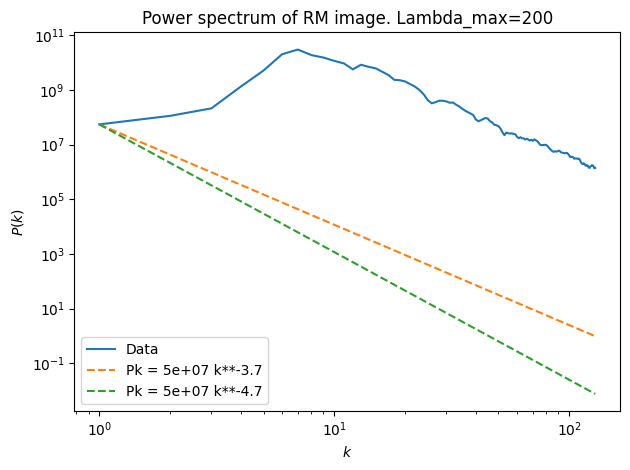

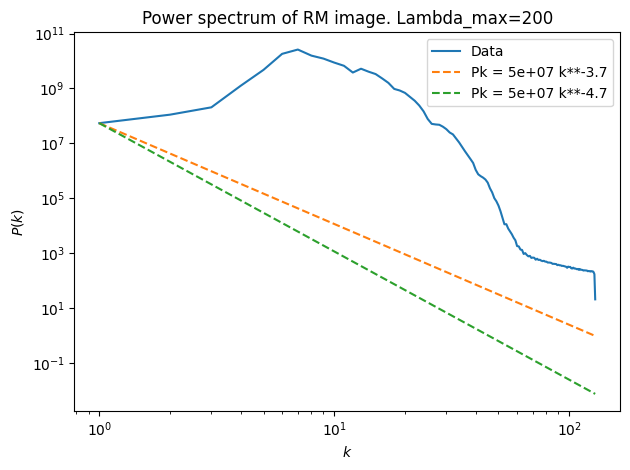

2025-06-12 15:02:23,988 INFO magneticfieldmodel run_model Calculating Stokes Q and U images
2025-06-12 15:02:23,992 INFO magneticfieldmodel run_model Convolving Stokes Q and U images
2025-06-12 15:02:24,045 INFO magneticfieldmodel run_model Script calculations finished. Took 18.2 seconds which is 0.0 hours or 0.0 days


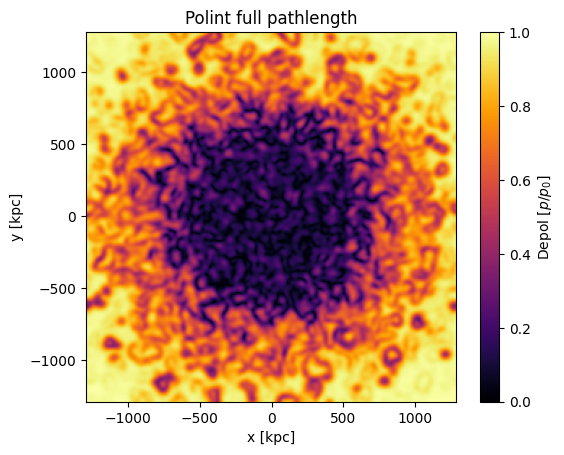

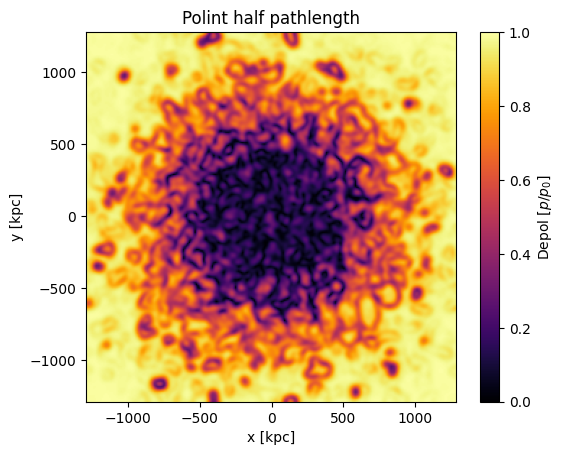

2025-06-12 15:02:24,336 INFO magneticfieldmodel save_results Saving results to ../tests_local/after_normalise/example_A2256/
2025-06-12 15:02:24,340 INFO magneticfieldmodel run_model Script fully finished. Took 18 seconds which is 0.0 hours or 0.0 days


In [6]:
# Start the actual calculation
model.run_model()

Plot 1. The magnetic field is a Gaussian random field showing fluctuations on a range of scales with decreasing amplitude.

Plot 2. The magnetic field amplitude follows the electron density to the power 0.5, because we have set eta=0.5

Plot 3. The magnetic field power-spectrum follows the correct power-law which we've set to Kolmogorov (xi=5.67, so B follows n = xi-2 = 3.67), up to the scale corresponding to Lambda_max, where power drops off rapidly. 

Plots 4 & 5. The electron density is a Lognormal random field showing fluctuations on a range of scales up to 100 kpc with decreasing amplitude.

Plot 6. The fluctuating electron density cube scatters around the user input radial profile, calculated from the beta-function.

Plots 7 & 8. The resulting RM images from integration of B and ne along the LOS

Plot 9. The resulting RM image power spectrum, we see that it follows the same power spectrum as the B-field.

Plot 10. The convolved RM image power spectrum, we see that the power drops off at small scales (large k) due to convolution

Plots 11 & 12. Resulting depolarisation images from integrating along the full pathlength or half the pathlength along the line of sight.



We can access the results as class variables

In [7]:
model.RMimage.shape

(256, 256)

In [8]:
model.RMconvolved.shape

(256, 256)